# Анализ деятельности ТОС Белгородского района

**Проверка гипотезы о том, что от размера сельского поселения зависит активность ТОС: чем крупнее поселение, тем моложе руководитель и как следствие больше активность ТОС**

В ходе проведенного анализа деятельности ТОС была расчитана активность ТОС, основанная на:
- форме регистрации ТОС (ЮЛ - 1, без регистрации - 0),
- доле активных членов ТОС (более 50% - 1, менее 50% - 0),
- активность ТОС (активный - 1, неактивный - 0),
- количество проектов, поданных на конкурсы,
- наличие социальной сети (есть - 1, нет - 0).

In [41]:
import pandas as pd

In [42]:
import matplotlib.pyplot as plt

In [54]:
tos = pd.read_csv(r'C:\Users\lenovo\Documents\Практикум\Мастерская\ТОСы Белгородской области\Активность ТОС.csv', sep=';')
print(tos)

      id Название ТОС  Активность          Поселение Население  \
0      1    «Рыболов»           4  Яснозоренское с/п     3 384   
1      2   «Становое»           4  Яснозоренское с/п     3 384   
2      3    "Гагарин"           4    Щетиновское с/п     1 034   
3      4  «Поколение»           4  Яснозоренское с/п     3 384   
4      5  «Солнечное»           4  Яснозоренское с/п     3 384   
..   ...          ...         ...                ...       ...   
194  195    Филиппины           0           Разумное    30 517   
195  196    Филиппова           0           Разумное    30 517   
196  197  Филиппова,7           0           Разумное    30 517   
197  198        Южный           0           Разумное    30 517   
198  199     Ягельный           0           Разумное    30 517   

     Возраст председателя  
0                      57  
1                      61  
2                      32  
3                      39  
4                      35  
..                    ...  
194        

In [44]:
tos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    199 non-null    int64 
 1   Название ТОС          199 non-null    object
 2   Активность            199 non-null    int64 
 3   Поселение             199 non-null    object
 4   Население             199 non-null    object
 5   Возраст председателя  199 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.5+ KB


In [45]:
tos['Население'] = tos['Население'].str.replace(' ', '')

In [46]:
tos['Население'] = tos['Население'].astype('int64')

In [53]:
# Создаю список столбцов для изучения
column_list = ['Активность', 'Население', 'Возраст председателя']

In [52]:
# Создаю матрицу корреляции между активностью ТОС, возрастом председателя и населением и вывожу ее на экран
corr_matrix = tos[column_list].corr()
display(corr_matrix)

,Активность,Население,Возраст председателя
Активность,1.000000,-0.426222,-0.019614
Население,-0.426222,1.000000,0.033694
Возраст председателя,-0.019614,0.033694,1.000000


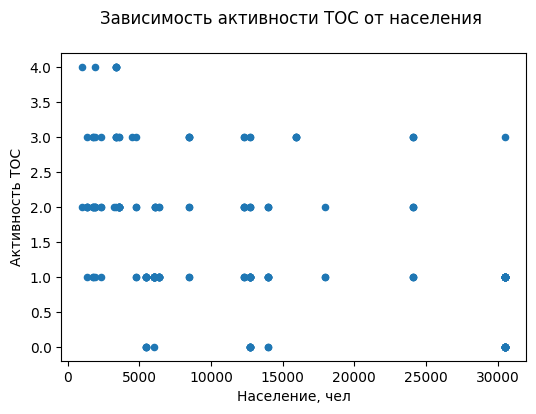

In [49]:
# Построю график зависимости Активности от Населения
tos.plot(x='Население', y ='Активность', kind ='scatter', figsize=(6, 4))

plt.title('Зависимость активности ТОС от населения \n')
plt.xlabel('Население, чел')
plt.ylabel('Активность ТОС');

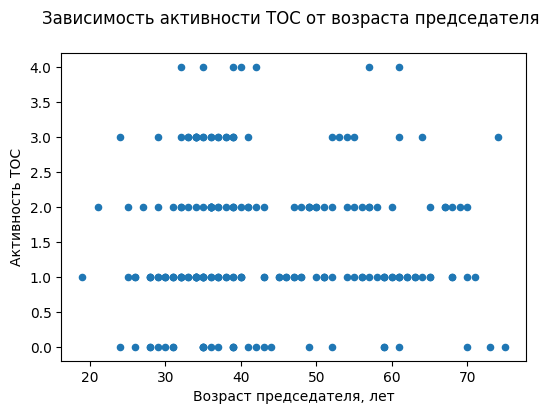

In [50]:
# Построю график зависимости Активности от Возрвста председателя
tos.plot(x='Возраст председателя', y ='Активность', kind ='scatter', figsize=(6, 4))

plt.title('Зависимость активности ТОС от возраста председателя \n')
plt.xlabel('Возраст председателя, лет')
plt.ylabel('Активность ТОС');

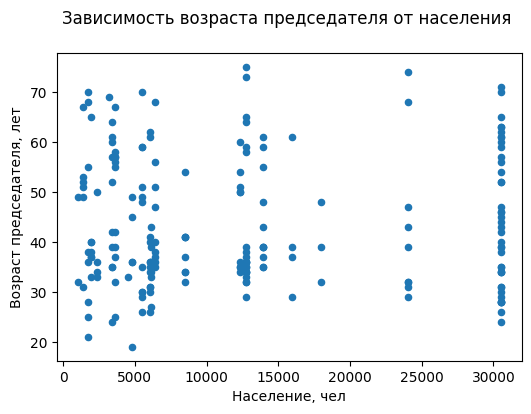

In [51]:
# Построю график зависимости Возраста председателя от Населения
tos.plot(x='Население', y ='Возраст председателя', kind ='scatter', figsize=(6, 4))

plt.title('Зависимость возраста председателя от населения \n')
plt.xlabel('Население, чел')
plt.ylabel('Возраст председателя, лет');

**Выводы:**
На матрице корреляции видно следующее:
- Есть слабая отрицательная зависимость между активностью ТОС и размером поселения (численность населения). То есть в поселениях с меньшей численностью населения активность выше.
- Зависимость между возрастом руководителя и активностью, а так же между возрастом руководителя и размером поселения (численностью населения) практически отсутствует.